In [1]:
import numpy as np 
import pandas as pd
import os
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models

In [2]:
data = pd.read_csv("bbc-text.csv")

In [3]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
data['category'].value_counts()



sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

/Users/Modesholar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

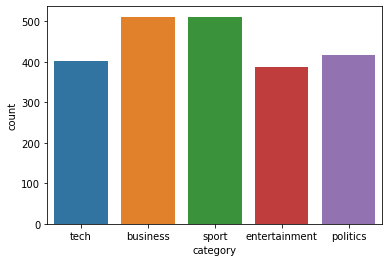

In [5]:
import seaborn as sns
sns.countplot(data['category'])

In [6]:
data['text'][10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

In [7]:
data.isnull().sum()

category    0
text        0
dtype: int64

In [8]:
#Text cleaning to remove stop words, symbols and spaces

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
#!pip install --user -U nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

STOPWORDS = set(stopwords.words('english'))
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Modesholar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data['text']=data['text'].apply(clean_text)
data['text'][10]

'berlin cheers antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing antinazi leaflets summer 1942 arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses si days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize festiva

In [10]:
T=[]
for i in data['text']:
    T.append(i)
len(T)


2225

In [11]:
maximum = max([len(s) for s in T])
print ('Maximum sequence length in the list of sentences:', maximum)

Maximum sequence length in the list of sentences: 16201


In [12]:
#Setting the maximum length of padding
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


In [13]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X, maxlen=3000)

In [14]:
X.shape

(2225, 3000)

In [15]:
Y = pd.get_dummies(data['category'],columns=data["category"]).values
len (Y)

2225

In [16]:
Y[5]

array([0, 0, 1, 0, 0], dtype=uint8)

In [17]:
data.head()

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raids bo office ocean twelve crim...


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1557, 3000) (1557, 5)
(668, 3000) (668, 5)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, Y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test.data)



AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train);

nb_pred = nb_clf.predict(X_train)
train_score = accuracy_score(Y_train, nb_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

nb_pred = nb_clf.predict(X_test.toarray())
test_score = accuracy_score(Y_test, nb_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

ValueError: y should be a 1d array, got an array of shape (1557, 5) instead.

In [5]:
train_size = int(len(data) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1557
Test size: 668


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trainS, y_trainS, test_size=0.3, random_state= 42)


train_cat, test_cat = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text'], train_size)

TypeError: Singleton array array(1557) cannot be considered a valid collection.